In [158]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

In [159]:
df=pd.read_csv('data/Netflix TV Shows and Movies.csv')
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [160]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


**chech the duplicate**

In [161]:
df.duplicated().sum()

0

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 330.3+ KB


**check the null values**

In [163]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

**fill the null values with zeros**

In [164]:
df=df.fillna(0)
df.isnull().sum()

index                0
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

**count the number of movie type**

MOVIE    3407
SHOW     1876
Name: type, dtype: int64


<AxesSubplot:>

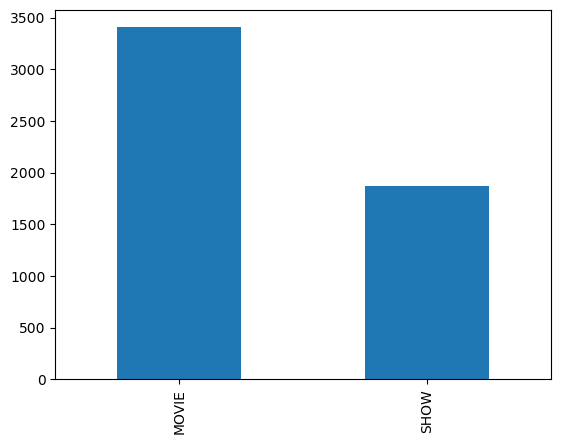

In [199]:
df_move_type=df.type.value_counts()
print(df_move_type)
df_move_type.plot(kind='bar')


**which movie type has the highst imdb_score**

type
MOVIE    6.266980
SHOW     7.017377
Name: imdb_score, dtype: float64


<AxesSubplot:xlabel='type'>

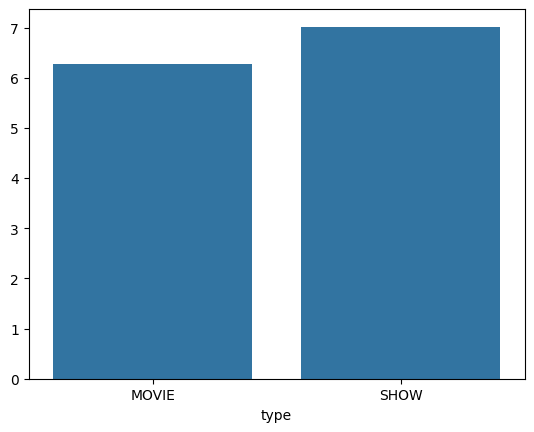

In [166]:
type_idbm_score=df.groupby('type')['imdb_score'].mean()
print(type_idbm_score)
sns.barplot(x=type_idbm_score.index,y=type_idbm_score.values)

**what are the top 5 movies that have the largest idbm votes?**

In [167]:
top_5_movie=df.groupby('title')['imdb_votes'].mean()
top_5_movie.sort_values(ascending=False)

title
Inception                           2268288.0
Forrest Gump                        1994599.0
Breaking Bad                        1727694.0
Django Unchained                    1472668.0
Saving Private Ryan                 1346020.0
                                      ...    
Lead Me Home                              0.0
Jarhead: Law of Return                    0.0
Jackass Presents: Bad Grandpa .5          0.0
In Vitro                                  0.0
Welcome to Sudden Death                   0.0
Name: imdb_votes, Length: 5237, dtype: float64

**plot the top 5 movies** 

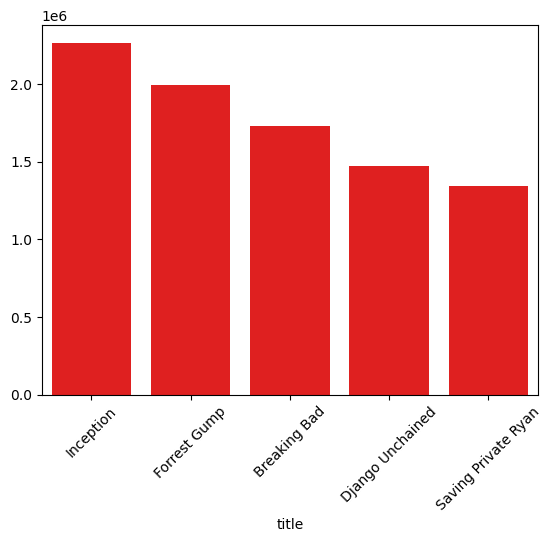

In [206]:
top_5_movies=top_5_movie.nlargest(5)
top_5_index=top_5_movies.index
top_5_values=top_5_movies.values
sns.barplot(x=top_5_index,y=top_5_values,color='r')
plt.xticks(rotation=45);

**which type of movies have the longest run time**

In [169]:
movie_run_time=df.groupby('type')['runtime'].mean()
movie_run_time

type
MOVIE    101.537423
SHOW      38.632729
Name: runtime, dtype: float64

<AxesSubplot:xlabel='type'>

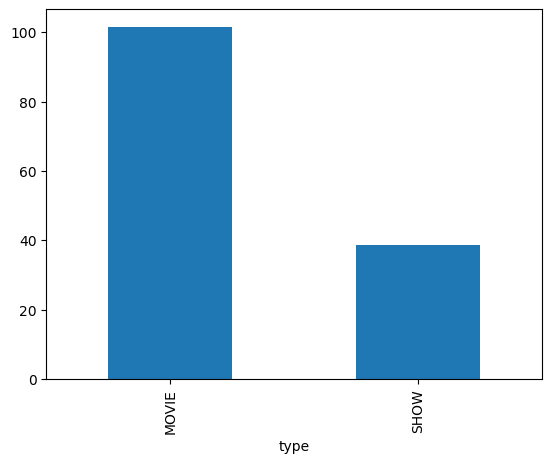

In [170]:
movie_run_time.plot(kind='bar')

**count of every age_certification in our data**

In [171]:
movie_age=df.age_certification.value_counts()
movie_age

0        2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: age_certification, dtype: int64

In [172]:
# replace 0 in age_certification with "General_Audience"
df['age_certification'] = df['age_certification'].replace(0, 'General_Audience')
movie_age=df.age_certification.value_counts()
movie_age

General_Audience    2285
TV-MA                792
R                    548
TV-14                436
PG-13                424
PG                   238
TV-PG                172
G                    105
TV-Y7                104
TV-Y                  94
TV-G                  72
NC-17                 13
Name: age_certification, dtype: int64

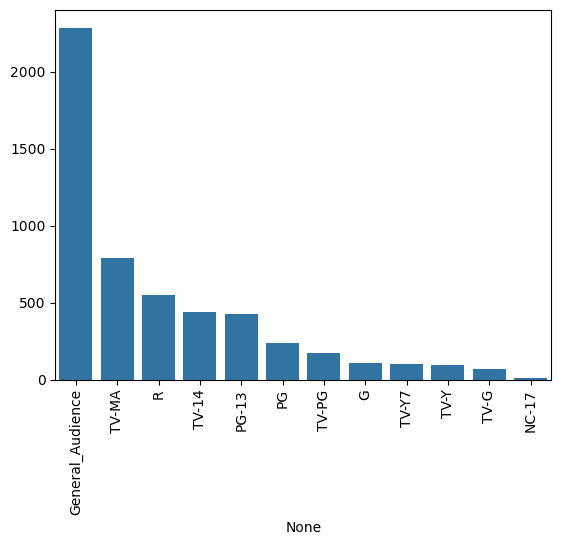

In [173]:
x = movie_age.index
y = movie_age.values
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.xlabel=('age_certification')



In [174]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


**which age_certification has the largest idbm votes and score**

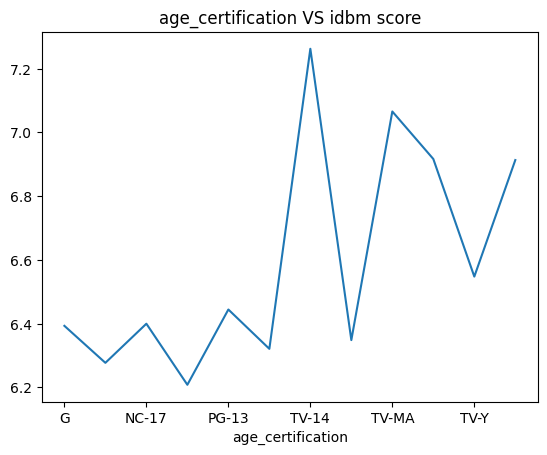

In [193]:
age_cer_score=df.groupby('age_certification')['imdb_score'].mean()
age_cer_score.sort_values(ascending=False)
age_cer_score.plot(kind='line')
plt.title("age_certification VS idbm score")
plt.show()


In [194]:
age_cer_votes=df.groupby('age_certification')['imdb_votes'].mean()

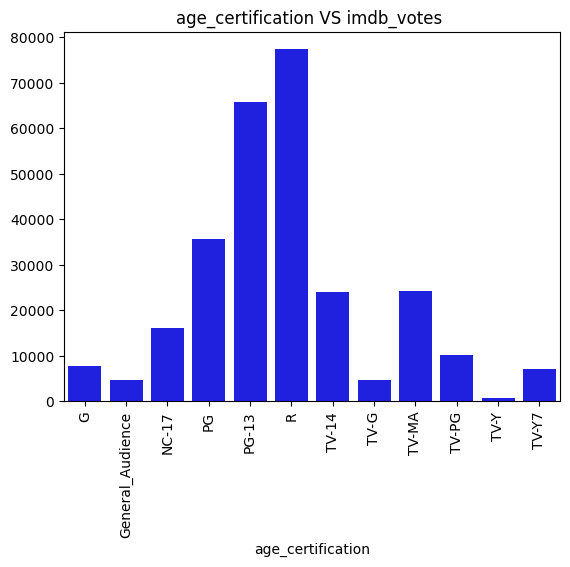

In [197]:
sns.barplot(x=age_cer_votes.index,y=age_cer_votes.values,color='b')
plt.title('age_certification VS imdb_votes ')
plt.xticks(rotation=90);


**count of each age certification for every movie type**

In [204]:
grouped_df = df.groupby(['type', 'age_certification']).size().reset_index(name='count')
grouped_df

,type,age_certification,count
0,MOVIE,G,105
1,MOVIE,General_Audience,2079
2,MOVIE,NC-17,13
3,MOVIE,PG,238
4,MOVIE,PG-13,424
5,MOVIE,R,548
6,SHOW,General_Audience,206
7,SHOW,TV-14,436
8,SHOW,TV-G,72
9,SHOW,TV-MA,792
